# Bibliotecas necessárias

ANALISE EXPLORATORIA DE DADOS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("./datasets/train.csv")

print(df.head())
print(df.info())
print(df.isnull().sum())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
id             0
keyword       61
lo

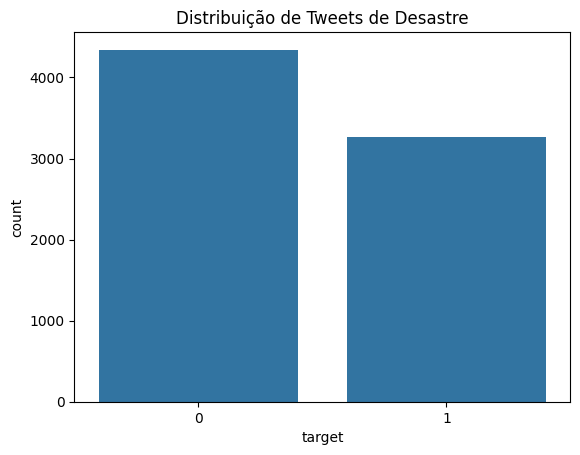

target
0    0.57034
1    0.42966
Name: proportion, dtype: float64


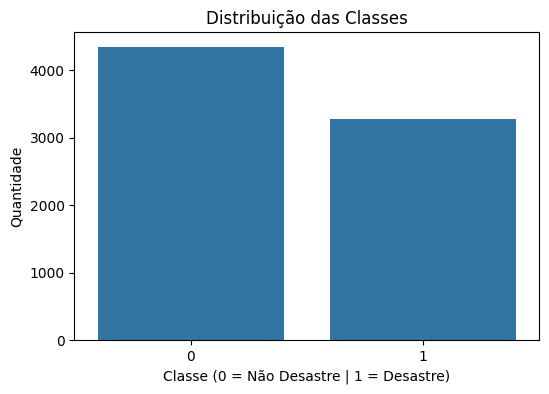

target
0    0.57034
1    0.42966
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x="target", data=df)
plt.title("Distribuição de Tweets de Desastre")
plt.show()

print(df["target"].value_counts(normalize=True))

plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df)
plt.title("Distribuição das Classes")
plt.xlabel("Classe (0 = Não Desastre | 1 = Desastre)")
plt.ylabel("Quantidade")
plt.show()

print(df["target"].value_counts(normalize=True))

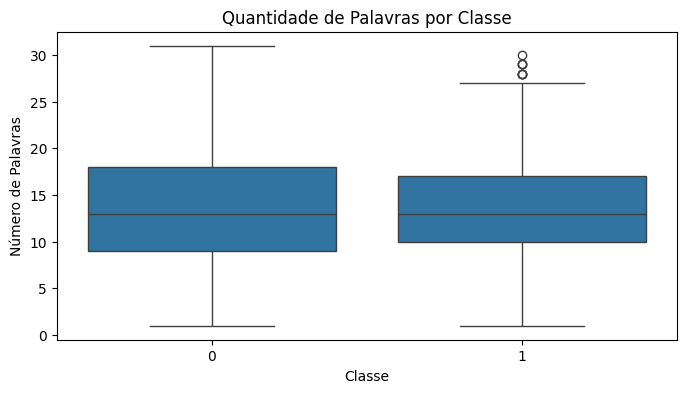

Quantidade de valores ausentes em keyword: 61
Quantidade de valores ausentes em location: 2533


Percentual de valores ausentes:

id             0.00
keyword        0.80
location      33.27
text           0.00
target         0.00
clean_text     0.00
word_count     0.00
dtype: float64


In [ ]:


#LISTANDO NULOS

print("Quantidade de valores ausentes em keyword:", df["keyword"].isnull().sum())
print("Quantidade de valores ausentes em location:", df["location"].isnull().sum())

print("\n\nPercentual de valores ausentes:\n")
print((df.isnull().mean() * 100).round(2))

Top 10 keywords mais frequentes:
keyword
fatalities     45
deluge         42
armageddon     42
damage         41
body%20bags    41
harm           41
sinking        41
evacuate       40
outbreak       40
fear           40
Name: count, dtype: int64


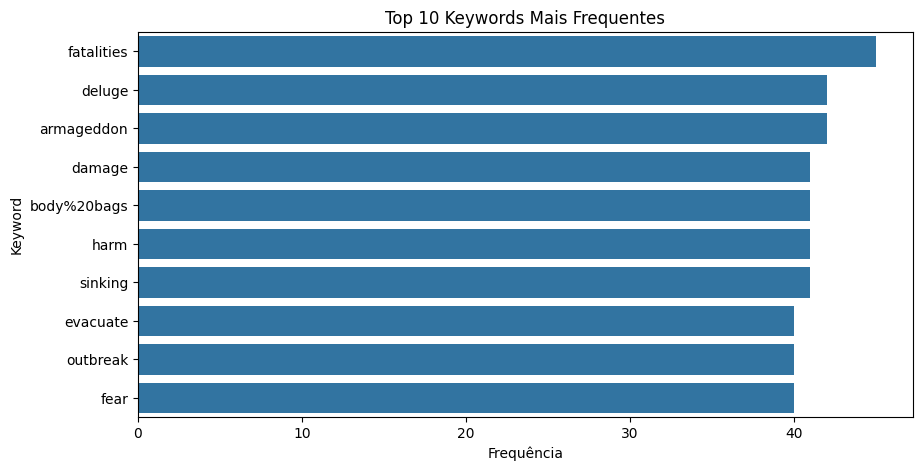

In [ ]:
print("Top 10 keywords mais frequentes:")

top_keywords = df["keyword"].value_counts().head(10)
print(top_keywords)
plt.figure(figsize=(10,5))
sns.barplot(x=top_keywords.values, y=top_keywords.index)
plt.title("Top 10 Keywords Mais Frequentes")
plt.xlabel("Frequência")
plt.ylabel("Keyword")
plt.show()

In [ ]:
#REMOCAO DE CARACTERES DESNECESSÁRIOS PRA ANALISE

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df["clean_text"] = df["text"].apply(clean_text)

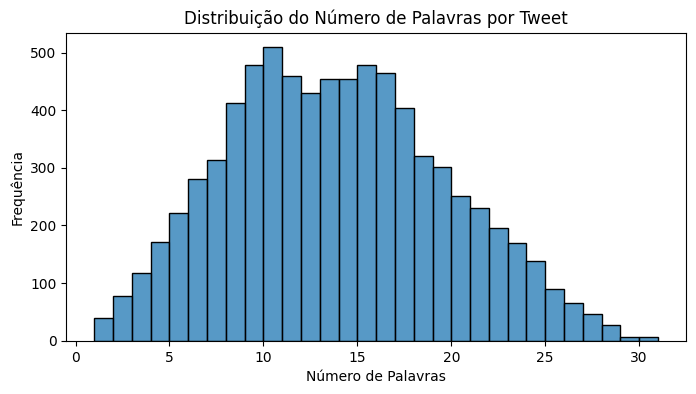

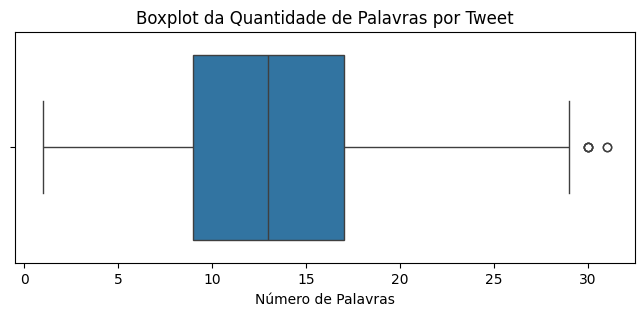

In [ ]:
#DISTRIBUICAO DE NUMERO DE PALAVRAS POR TWEET

plt.figure(figsize=(8,4))
sns.histplot(df["word_count"], bins=30)
plt.title("Distribuição do Número de Palavras por Tweet")
plt.xlabel("Número de Palavras")
plt.ylabel("Frequência")
plt.show()

plt.figure(figsize=(8,3))
sns.boxplot(x=df["word_count"])
plt.title("Boxplot da Quantidade de Palavras por Tweet")
plt.xlabel("Número de Palavras")
plt.show()

In [ ]:
#PALAVRAS QUE MAIS APARECEM NO DATASET

all_words = " ".join(df["clean_text"]).split()
word_freq = Counter(all_words)

print(word_freq.most_common(20))

[('the', 3270), ('a', 2195), ('in', 1979), ('to', 1946), ('of', 1828), ('and', 1420), ('i', 1404), ('is', 944), ('for', 893), ('on', 855), ('you', 797), ('my', 676), ('with', 572), ('it', 569), ('that', 562), ('at', 542), ('by', 525), ('this', 478), ('from', 421), ('be', 408)]


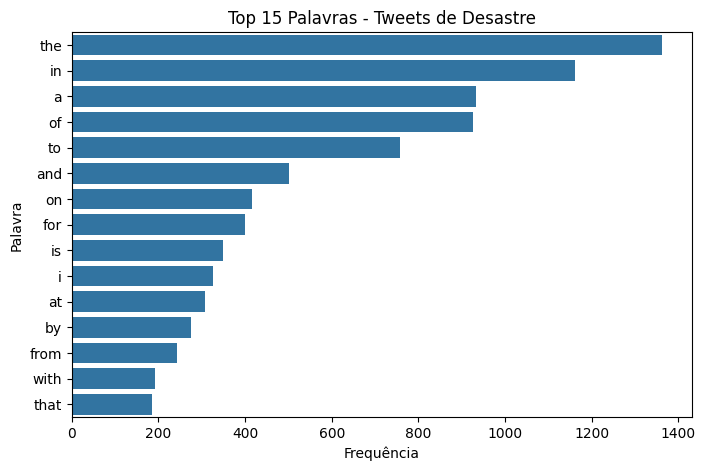

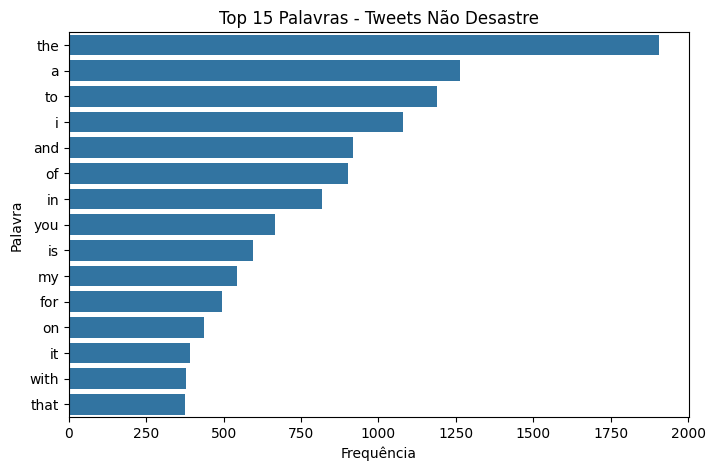

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

disaster_words = " ".join(df[df["target"] == 1]["clean_text"]).split()
non_disaster_words = " ".join(df[df["target"] == 0]["clean_text"]).split()

top_disaster = Counter(disaster_words).most_common(15)
top_non_disaster = Counter(non_disaster_words).most_common(15)

df_disaster = pd.DataFrame(top_disaster, columns=["palavra", "frequencia"])
df_non_disaster = pd.DataFrame(top_non_disaster, columns=["palavra", "frequencia"])

plt.figure(figsize=(8,5))
sns.barplot(data=df_disaster, x="frequencia", y="palavra")
plt.title("Top 15 Palavras - Tweets de Desastre")
plt.xlabel("Frequência")
plt.ylabel("Palavra")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=df_non_disaster, x="frequencia", y="palavra")
plt.title("Top 15 Palavras - Tweets Não Desastre")
plt.xlabel("Frequência")
plt.ylabel("Palavra")
plt.show()

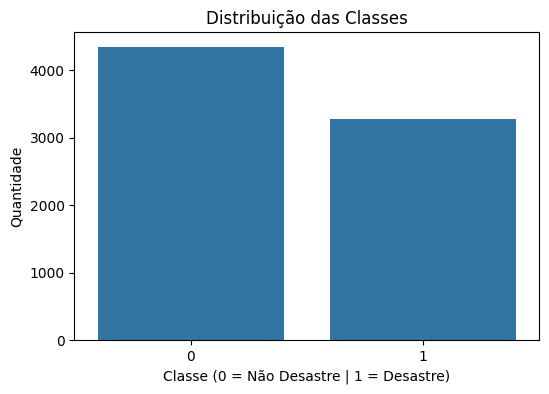

target
0    0.57034
1    0.42966
Name: proportion, dtype: float64


<Axes: >

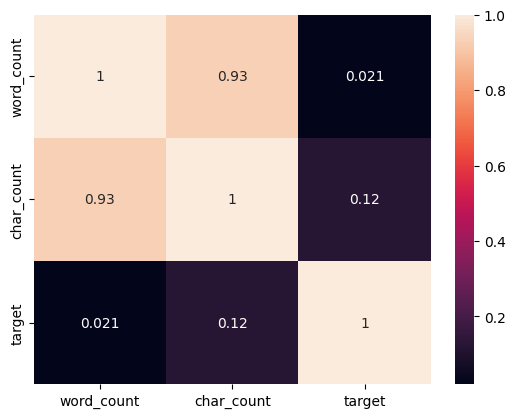

In [ ]:
df["char_count"] = df["clean_text"].fillna("").apply(len)
sns.heatmap(df[["word_count","char_count","target"]].corr(), annot=True)